In [131]:
import skimage.io as sk
import numpy as np
from Functions import image_processing as ip

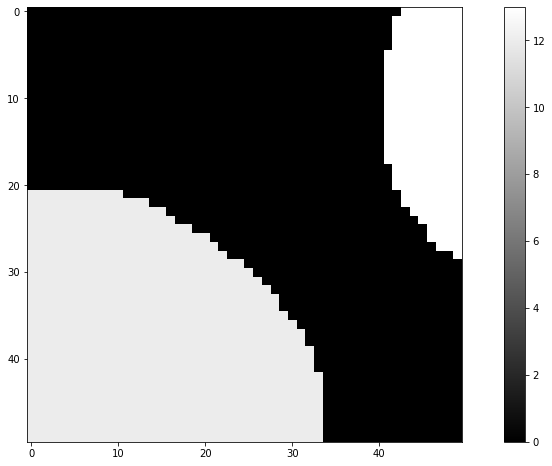

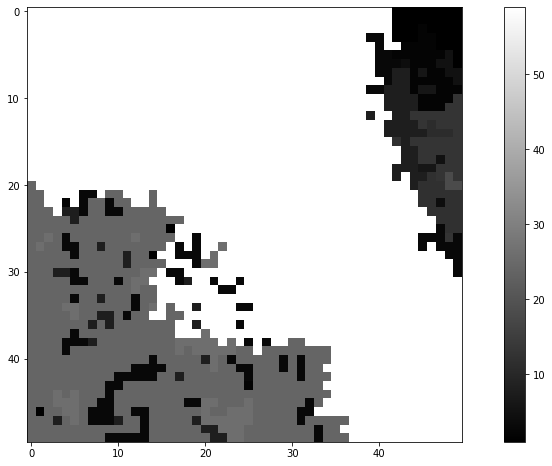

In [132]:
gt = sk.imread("../Data/N2DH-GOWT1/gt/man_seg01.tif")
gt_resize = gt[300:350, 400:450]
ip.show_image(gt_resize,15,8)

segmented_image = sk.imread("../t01tifimg.tif")
ip.show_image(segmented_image,15,8)

In [133]:
def segmented_image_clip (segmented_image, background_region):
    for i in range(0, segmented_image.shape[0]):
        for j in range(0, segmented_image.shape[1]):
            region = segmented_image[i, j]
            if region == background_region:
                segmented_image[i, j] = 0
            else:
                segmented_image[i, j] = 1
    return segmented_image

def find_background_number (regions):
    regions = regions.astype(int)
    background_number = np.bincount(regions.flatten()).argmax()
    return background_number

def gt_clip(gt):
    clipped_gt = np.ndarray.clip(gt,0, 1)
    return clipped_gt

def intersection_count(segmented_image, gt, region_number):
    intersection_number = 0
    for pixel in np.ndindex(segmented_image.shape):
        if segmented_image[pixel] == gt[pixel] == region_number:
            intersection_number += 1
    return intersection_number

def region_count(regions_image, region_number):
    count_region = np.sum(regions_image == region_number)
    return count_region

def region_dice_score(segmented_image, gt, region_number):
    count_intersection = intersection_count(segmented_image, gt, region_number)
    count_segmented_image = region_count(segmented_image,region_number)
    count_gt = region_count(gt, region_number)
    region_score = 2* count_intersection/ ( count_segmented_image+ count_gt)
    return region_score

def dice_score_weighted(segmented_image, gt):
    dice_score_background = region_dice_score(segmented_image, gt, 0)
    dice_score_nucleus = region_dice_score(segmented_image, gt, 1)
    dice_score = 0.5 * (dice_score_nucleus + dice_score_background)
    return dice_score

def dice_score_unweighted(segmented_image, gt):
    count_intersection = intersection_count(segmented_image, gt, 0) + intersection_count(segmented_image, gt, 1)
    dice_score = 2*count_intersection/(segmented_image.size + gt.size)
    return dice_score


def evaluate_accuracy_weighted(segmented_image, gt):
    clipped_gt = gt_clip(gt)
    background_number = find_background_number(segmented_image)
    clipped_segmented_image = segmented_image_clip(segmented_image, background_number)
    dice_score = dice_score_weighted(clipped_segmented_image, clipped_gt)
    return dice_score

def evaluate_accuracy_unweighted(segmented_image, gt):
    clipped_gt = gt_clip(gt)
    background_number = find_background_number(segmented_image)
    clipped_segmented_image = segmented_image_clip(segmented_image, background_number)
    dice_score = dice_score_unweighted(clipped_segmented_image, clipped_gt)
    return dice_score

In [134]:
dice_score_weight = evaluate_accuracy_weighted(segmented_image, gt_resize)
dice_score_unweight = evaluate_accuracy_unweighted(segmented_image, gt_resize)
print(dice_score_weight)
print(dice_score_unweight)

0.922304174427804
0.9264
